In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
ROOT_DIR = "."
FILENAME = "results.tsv"

In [4]:
df = pd.read_csv(os.path.join(ROOT_DIR, FILENAME), sep="\t", header=0)

In [5]:
df.tail()

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
6023,pp033,M,60,stroke,Slow,NaN,right_shank,FC,440.0,439.0,1.0,5.0,1,1,1,0,0,1
6024,pp033,M,60,stroke,Slow,NaN,right_shank,FC,768.0,770.0,-2.0,-10.0,1,1,1,0,0,1
6025,pp033,M,60,stroke,Slow,NaN,right_shank,FC,1113.0,1114.0,-1.0,-5.0,1,1,1,0,0,1
6026,pp033,M,60,stroke,Slow,NaN,right_shank,FC,1450.0,1450.0,0.0,0.0,1,1,1,0,0,1
6027,pp033,M,60,stroke,Slow,NaN,right_shank,FC,1804.0,1805.0,-1.0,-5.0,1,1,1,0,0,1


## Events
Split events by event type. We don't want to mix up the detection of initial contacts and final contacts.

In [29]:
df_ic = df.loc[df['event_type']=='IC']
df_fc = df.loc[df['event_type']=='FC']

<AxesSubplot:xlabel='Detect event', ylabel='Annotated event'>

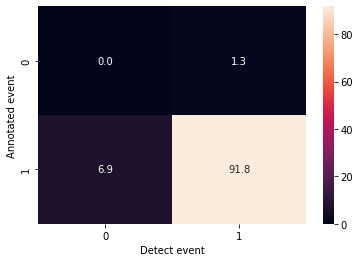

In [30]:
confusion_matrix = pd.crosstab(df_ic['event_true'], df_ic['event_predicted'], rownames=['Annotated event'], colnames=['Detect event'])
normalized_confusion_matrix = confusion_matrix / confusion_matrix.sum().sum() * 100
sns.heatmap(normalized_confusion_matrix, annot=True, fmt=".1f")

<AxesSubplot:xlabel='Detect event', ylabel='Annotated event'>

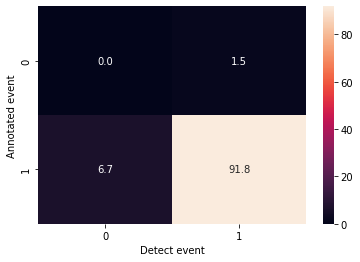

In [31]:
confusion_matrix = pd.crosstab(df_fc['event_true'], df_fc['event_predicted'], rownames=['Annotated event'], colnames=['Detect event'])
normalized_confusion_matrix = confusion_matrix / confusion_matrix.sum().sum() * 100
sns.heatmap(normalized_confusion_matrix, annot=True, fmt=".1f")

## Overall detection performance

In [6]:
df["tp"].sum(), df["fp"].sum(), df["fn"].sum()

(2624, 20, 339)

In [7]:
len(df)

2983

In [8]:
print(f"{22*' ':s}{' | ':s}Prediction condition")
print(f"{22*' ':s}{' | ':s}{'POS':^8s}{' | '}{'NEG':^8s}")
print(f"{45*'-':s}")
print(f"{'Actual':>16s}{' | '}{'POS'}{' | '}{'tp':^8s}{' | '}{'fn':^8s}")
print(f"{'condition':>16s}{' | '}{'NEG'}{' | '}{'fp':^8s}{' | '}{'tn':^8s}")

                       | Prediction condition
                       |   POS    |   NEG   
---------------------------------------------
          Actual | POS |    tp    |    fn   
       condition | NEG |    fp    |    tn   


In [9]:
print(f"{'CONFUSION MATRIX':^45s}")
print(f"{22*' ':s}{' | ':s}Prediction condition")
print(f"{22*' ':s}{' | ':s}{'POS':^8s}{' | '}{'NEG':^8s}")
print(f"{45*'-':s}")
print(f"{'Actual':>16s}{' | '}{'POS'}{' | '}{df['tp'].sum():^8d}{' | '}{df['fn'].sum():^8d}")
print(f"{'condition':>16s}{' | '}{'NEG'}{' | '}{df['fp'].sum():^8d}{' | '}{'tn':^8s}")

              CONFUSION MATRIX               
                       | Prediction condition
                       |   POS    |   NEG   
---------------------------------------------
          Actual | POS |   2624   |   339   
       condition | NEG |    20    |    tn   


In [10]:
print(f"{'CONFUSION MATRIX':^45s}")
print(f"{22*' ':s}{' | ':s}Prediction condition")
print(f"{22*' ':s}{' | ':s}{'POS':^8s}{' | '}{'NEG':^8s}")
print(f"{45*'-':s}")
print(f"{'Actual':>16s}{' | '}{'POS'}{' | '}{df['tp'].sum()/len(df)*100:^8.2f}{' | '}{df['fn'].sum()/len(df)*100:^8.2f}")
print(f"{'condition':>16s}{' | '}{'NEG'}{' | '}{df['fp'].sum()/len(df)*100:^8.2f}{' | '}{'tn':^8s}")

              CONFUSION MATRIX               
                       | Prediction condition
                       |   POS    |   NEG   
---------------------------------------------
          Actual | POS |  87.97   |  11.36  
       condition | NEG |   0.67   |    tn   


In [11]:
df_ic = df.loc[df["event_type"]=="IC"]
df_fc = df.loc[df["event_type"]=="FC"]

In [12]:
def pretty_print_conf_matr(df, normalized=False):
    if normalized:
        print(f"{'CONFUSION MATRIX':^45s}")
        print(f"{22*' ':s}{' | ':s}Prediction condition")
        print(f"{22*' ':s}{' | ':s}{'POS':^8s}{' | '}{'NEG':^8s}")
        print(f"{45*'-':s}")
        print(f"{'Actual':>16s}{' | '}{'POS'}{' | '}{df['tp'].sum()/len(df)*100:^8.2f}{' | '}{df['fn'].sum()/len(df)*100:^8.2f}")
        print(f"{'condition':>16s}{' | '}{'NEG'}{' | '}{df['fp'].sum()/len(df)*100:^8.2f}{' | '}{'tn':^8s}")
    else:
        print(f"{'CONFUSION MATRIX':^45s}")
        print(f"{22*' ':s}{' | ':s}Prediction condition")
        print(f"{22*' ':s}{' | ':s}{'POS':^8s}{' | '}{'NEG':^8s}")
        print(f"{45*'-':s}")
        print(f"{'Actual':>16s}{' | '}{'POS'}{' | '}{df['tp'].sum():^8d}{' | '}{df['fn'].sum():^8d}")
        print(f"{'condition':>16s}{' | '}{'NEG'}{' | '}{df['fp'].sum():^8d}{' | '}{'tn':^8s}")

In [13]:
pretty_print_conf_matr(df_fc, normalized=True)

              CONFUSION MATRIX               
                       | Prediction condition
                       |   POS    |   NEG   
---------------------------------------------
          Actual | POS |  89.64   |   9.35  
       condition | NEG |   1.01   |    tn   


In [16]:
df_ic[["sub", "task", "run", "event_type", "tp", "fn", "fp"]].groupby(["sub", "task", "run", "event_type"]).sum()

tp  fn  fp
sub   task      run event_type            
pp022 Fast      off IC           7   0   0
                on  IC           6   1   0
      Preferred off IC           7   0   0
                on  IC           6   2   0
      Slow      on  IC           9   0   0
pp046 Fast      off IC           5   6   0
                on  IC           9   2   0
      Preferred off IC           8   5   0
                on  IC          11   0   0
      Slow      off IC          14   0   0
                on  IC          12   0   0
pp053 Fast      on  IC          13   4   0
      Preferred on  IC          10   6   0
      Slow      on  IC          12   3   0
pp059 Fast      off IC          10   0   0
      Preferred off IC          11   0   0
      Slow      off IC          11   1   0
pp069 Fast      off IC           6   1   0
      Preferred off IC           8   0   0
      Slow      off IC          10   0   0
pp075 Fast      off IC           7   1   0
                on  IC           6   1   0
      Preferred off IC           8   2   0
                on  IC           7   2   0
      Slow      off IC          11   0   0
                on  IC           9   2   0
pp102 Fast      off IC           6   1   0
                on  IC           6   1   0
      Preferred off IC           7   1   0
                on  IC           5   3   0
      Slow      off IC           9   0   0
                on  IC           7   2   0
pp113 Fast      off IC           6   2   0
      Preferred off IC          10   0   0
      Slow      off IC          11   0   0
pp140 Fast      on  IC           7   1   0
      Preferred on  IC           8   1   0
      Slow      on  IC          12   1   0

In [ ]:
print(len(df["sub"].unique()))

NameError: name 'df' is not defined

## Time error

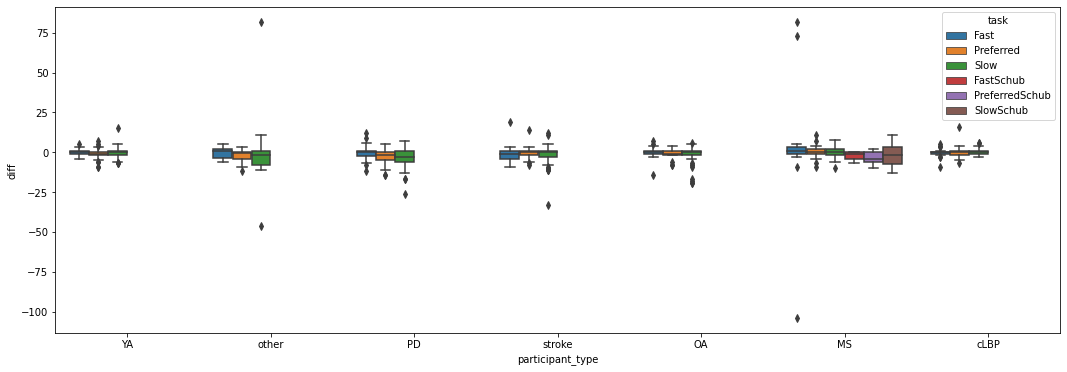

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
sns.boxplot(ax=ax, data=df_ic, x="participant_type", y="diff", hue="task")
plt.show()

In [18]:
df_ic["diff"].describe()

count    1292.000000
mean       -0.962074
std         6.355779
min      -104.000000
25%        -3.000000
50%        -1.000000
75%         1.000000
max        82.000000
Name: diff, dtype: float64

In [38]:
(df_ic["diff"].quantile(0.1), df_ic["diff"].quantile(0.9))

(-6.0, 3.0)

In [37]:
df_ic.loc[df_ic["diff"]<df_ic["diff"].quantile(0.1)]

,sub,gender,participant_type,task,run,side,event_type,ix_ref,ix_pred,diff,tp,fp,fn,checksum
97,pp012,M,other,Slow,NaN,left,IC,711.0,718.0,-7.0,1,0,0,1
102,pp012,M,other,Slow,NaN,left,IC,1814.0,1824.0,-10.0,1,0,0,1
322,pp025,M,stroke,Fast,NaN,right,IC,499.0,508.0,-9.0,1,0,0,1
443,pp029,M,MS,Preferred,NaN,left,IC,292.0,299.0,-7.0,1,0,0,1
455,pp029,M,MS,Preferred,NaN,right,IC,962.0,971.0,-9.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,pp140,M,PD,Slow,on,right,IC,1252.0,1259.0,-7.0,1,0,0,1
2617,pp140,M,PD,Slow,on,right,IC,1556.0,1568.0,-12.0,1,0,0,1
2673,pp149,M,stroke,Slow,NaN,right,IC,1876.0,1909.0,-33.0,1,0,0,1
2738,pp155,F,MS,Fast,NaN,left,IC,34.0,138.0,-104.0,1,0,0,1


/home/robbin/Projects/my-gait-events-tcn/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-25.0, 25.0)

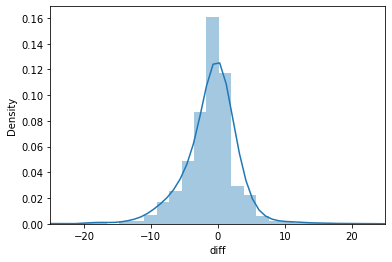

In [36]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_ic['diff'], bins=100)
ax.set_xlim([-25, 25])